In [1]:
import re
import pandas as pd
pd.set_option('display.max_colwidth', 200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('twitter_sentiment_data.csv')
data.drop('tweetid', axis=1, inplace=True)

In [3]:
data

,sentiment,message
0,-1,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom
1,1,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦"
2,1,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube
3,1,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦"
...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Mediated Climate Change is a Chinese urban legend. https://t.co/LLLx3iEj4y"
43939,1,What will your respective parties do to prevent climate change globally? #ZPNDebate
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is the Lowest of All Global Concerns https://t.co/OopCQJvoGA
43941,0,"RT @taehbeingextra: i still can$q$t believe this gif of taehyung saved the human race, stopped global warming and watered every plant on…"


In [4]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [5]:
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['message'], "@[\w]*")
data.head()

,sentiment,message,tidy_tweet
0,-1,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom,climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom
1,1,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦","RT : Watch #BeforeTheFlood right here, as travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦"
2,1,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via
3,1,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im,RT : Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦","RT : Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦"


In [6]:
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
data.head()

,sentiment,message,tidy_tweet
0,-1,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom,climate change is an interesting hustle as it was global warming but the planet stopped warming for yes while the suv boom
1,1,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦",RT Watch #BeforeTheFlood right here as travels the world to tackle climate change https t co LkDehj tNn htt
2,1,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube,Fabulous Leonardo #DiCaprio s film on #climate change is brilliant Do watch https t co rV BrmxjW via
3,1,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im,RT Just watched this amazing documentary by leonardodicaprio on climate change We all think this https t co kNSTE K im
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦",RT Pranita Biswasi a Lutheran from Odisha gives testimony on effects of climate change amp natural disasters on the po


In [7]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,sentiment,message,tidy_tweet
0,-1,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom,climate change interesting hustle global warming planet stopped warming while boom
1,1,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦",Watch #BeforeTheFlood right here travels world tackle climate change https LkDehj
2,1,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube,Fabulous Leonardo #DiCaprio film #climate change brilliant watch https BrmxjW
3,1,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im,Just watched this amazing documentary leonardodicaprio climate change think this https kNSTE
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦",Pranita Biswasi Lutheran from Odisha gives testimony effects climate change natural disasters


In [8]:
tokenized_tweets = data['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweets.head()

0                [climate, change, interesting, hustle, global, warming, planet, stopped, warming, while, boom]
1                 [Watch, #BeforeTheFlood, right, here, travels, world, tackle, climate, change, https, LkDehj]
2                      [Fabulous, Leonardo, #DiCaprio, film, #climate, change, brilliant, watch, https, BrmxjW]
3     [Just, watched, this, amazing, documentary, leonardodicaprio, climate, change, think, this, https, kNSTE]
4    [Pranita, Biswasi, Lutheran, from, Odisha, gives, testimony, effects, climate, change, natural, disasters]
Name: tidy_tweet, dtype: object

In [9]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x])

In [10]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])
    
data['tidy_tweet'] = tokenized_tweets

In [11]:
train, test = train_test_split(data, test_size=0.3)

In [12]:
train.shape, test.shape

((30760, 3), (13183, 3))

In [13]:
train[train['sentiment'] != -1].head()

,sentiment,message,tidy_tweet
20187,0,"RT @andrewsharp: Win probability is bullshit man. I saw the NBA Finals and that's when I knew, global warming isn't real",probabl bullshit final that when knew global warm real
33090,1,"After last week's storm, we need to talk about climate change https://t.co/0ZWCBcxyYW",after last week storm need talk about climat chang http zwcbcxyyw
29024,2,RT @livemint: International Solar Alliance becomes India’s calling card on climate change https://t.co/lJkpj9TQQT,intern solar allianc becom india call card climat chang http ljkpj tqqt
31478,0,RT @trapgodkenya: It has never snowed twice in Atlanta. Thatâ€™s that good ole global warming,never snow twice atlanta that that good global warm
34856,0,RT @AsiaChloeBrown: We need to buy Detroit. It's one of the only regions that is going to hold up to climate change and there is already aâ€¦,need detroit onli region that go hold climat chang there alreadi


In [14]:
train[train['sentiment'] == -1].head()

,sentiment,message,tidy_tweet
24423,-1,RT @KurtSchlichter: I support global warming.\nI am glad Don Jr tried to get evidence against Hillary.\nYou are the sex you were born.\nLibera…,support global warm glad tri evid against hillari were born libera
4883,-1,"RT @ZebulonPike1813: @luisbaram Definitely caused by global warming. Quick, hand over all your money!",definit caus global warm quick hand over your money
42296,-1,RT @LyndaMick: So great that Obama is on the ball - giving talks about Climate Change while the world is being attacked by terrorists. #sha…,great that obama ball give talk about climat chang while world be attack terrorist #sha
43917,-1,RT @braintwat: https://t.co/GCF7F8B6g0,http
22917,-1,Dems and libs care more about 'climate change' than this https://t.co/NZ39WCderJ,dem lib care more about climat chang than thi http wcderj


In [15]:
train['sentiment'].value_counts()

 1    16058
 2     6520
 0     5418
-1     2764
Name: sentiment, dtype: int64

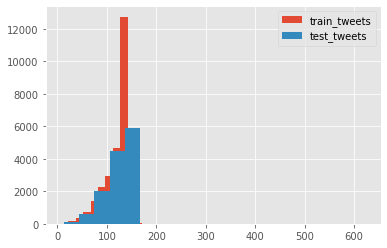

In [16]:
length_train = train['message'].str.len()
length_test = test['message'].str.len()

plt.hist(length_train, bins=20, label='train_tweets')
plt.hist(length_test, bins=20, label='test_tweets')
plt.legend()
plt.show()

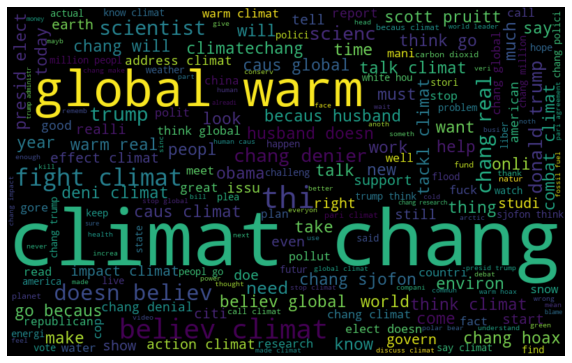

In [17]:
all_words = ' '.join([text for text in data['tidy_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

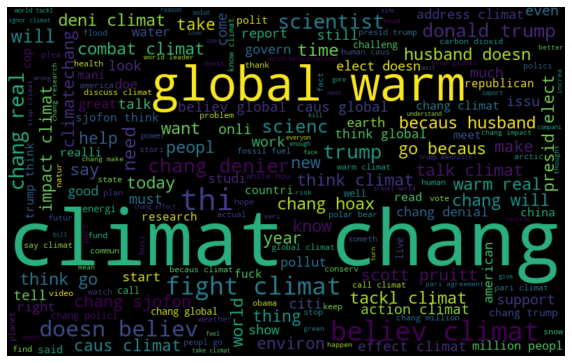

In [18]:
normal_words = ' '.join([text for text in data['tidy_tweet'][data['sentiment'] != -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

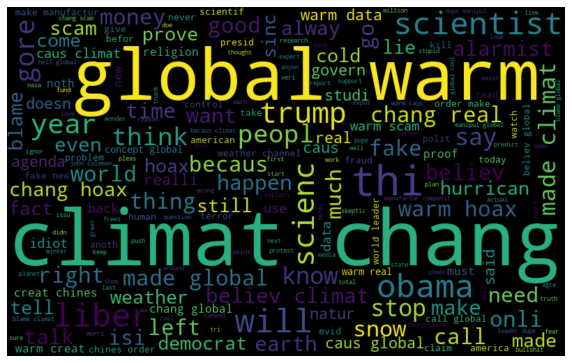

In [19]:
negative_words = ' '.join([text for text in data['tidy_tweet'][data['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    return hashtags

In [22]:
HT_regular = hashtag_extract(data['tidy_tweet'][data['sentiment'] != -1])

HT_negative = hashtag_extract(data['tidy_tweet'][data['sentiment'] == -1])

HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

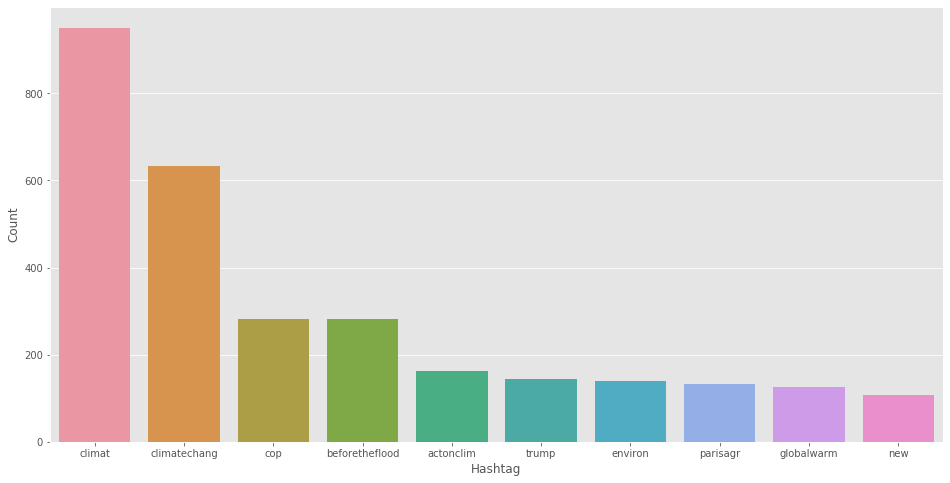

In [26]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                 'Count': list(a.values())})

d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=d, x='Hashtag', y='Count')
ax.set(ylabel='Count')
plt.show()

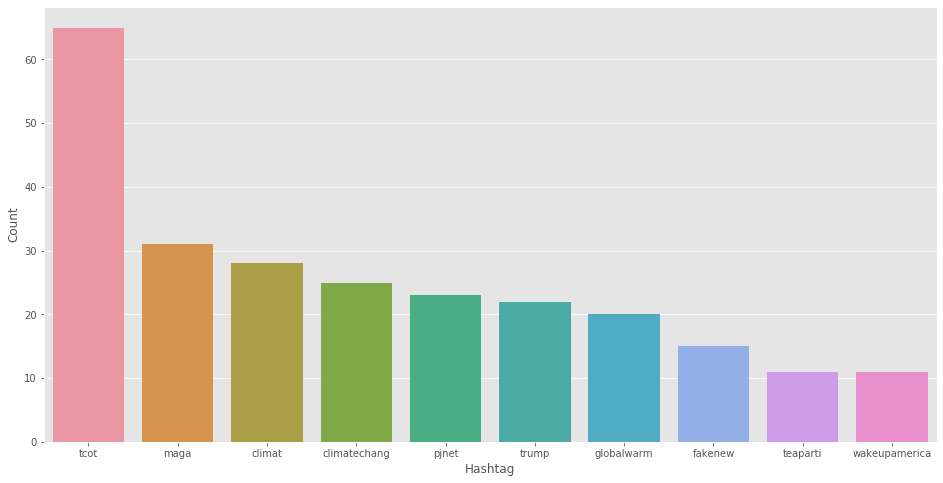

In [30]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()),
                 'Count': list(b.values())})

e = e.nlargest(columns='Count', n=10)
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=e, x='Hashtag', y='Count')
ax.set(ylabel='Count')
plt.show()